# Ford Gobike System data exploration
## by Sheila Alwanga Olayo

## Introduction
> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, for the month of February, 2019.


## Preliminary Wrangling


In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [51]:
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [52]:
#checking for column datatypes and missing values.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [53]:
#checking for duplicate records
print(sum(bike.duplicated()))

0


In [54]:
#changing data types of 'start_time' and 'end_time' columns
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

print(bike.start_time.dtype)
print(bike.end_time.dtype)

datetime64[ns]
datetime64[ns]


In [55]:
#dropping all rows with null values
bike.dropna(inplace = True)

In [56]:
#changing data type of 'member_birth_year' column
bike.member_birth_year = bike.member_birth_year.astype(int)

In [57]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory usag

In [58]:
#extracting 'day' and 'date' from 'start_time' column
bike['date'] = bike['start_time'].dt.date
bike['day'] = bike['start_time'].dt.day_name()

In [59]:
#converting 'day' to an ordered categorical datatype
day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
wk_day = pd.api.types.CategoricalDtype(ordered = True, categories = day)
bike.day = bike.day.astype(wk_day)

In [60]:
#creating an 'age' column
bike['age'] = 2019 - bike.member_birth_year 

In [61]:
#checking unique 'age' values
print(np.sort(bike.age.unique())) 

[ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  80  81  85  86  88  89  91  92  99 109 117
 118 119 141]


In [62]:
#filtering out rows with age 99 and over
bike = bike.loc[bike.age < 93].copy()

In [63]:
#creating a duration in minutes column
bike['duration_min'] = bike.duration_sec/60

Creating a categorical time_period column in the following cells

In [64]:
#creating a dictionary of time periods
time_periods = [{'period':'morning','start':'5:59:01','end':'11:59:00'},
{'period':'afternoon','start':'11:59:01','end':'15:59:00'},
{'period':'evening','start':'15:59:01','end':'23:59:00'},
{'period':'late_night','start':'23:59:01','end':'5:59:00'}]

In [65]:
#creating a function to create new dataframes according to daytime periods
def day_period(start_time,end_time):
    '''creates new dataframes according to day time periods'''
    period_df = bike.between_time(start_time,end_time)
    return period_df.copy()

In [66]:
#setting 'bike' df's start_time as index, so as to be able to use the between_time() function on it
bike = bike.set_index('start_time')

In [67]:
#creating time _period data frames
i = 0
while i < 4:
    morning = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1
    afternoon = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1
    evening = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1
    late_night = day_period(time_periods[i]['start'],time_periods[i]['end'])
    i += 1


In [68]:
#creating a function to add a day_period column to the dataframes
def add_column(df,value):
    df['day_period'] = value

In [69]:
#adding day_period column to the dataframes
day_period = [(morning,'morning'),(afternoon,'afternoon'),(evening,'evening'),(late_night,'late_night')]
for period in day_period:
    add_column(period[0],period[1])

In [70]:
#merging the four datasets to replace original 'bike' dataset
bike = morning.append([afternoon,evening,late_night],ignore_index  = False)

In [71]:
#resetting bike df's index
bike = bike.reset_index()

### What is the structure of your dataset?

> My dataset initially had 183,412 records and 16 columns. However after some wrangling which involved dropping records with null or inaccurate values and some feature engineering, the dataset now has 174,877 records and 21 columns. The five additional columns include **'date', 'day', 'day_period'** derived from the **'start_time'** column, **'age'** derived from **'member_birth_year'** column and **'duration_min'** derived from the **'duration_sec'** column.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are time and demographic information features with focus on how they affect the number of bike rides.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the time features (**'duration_sec', 'start_time', 'end_time','start_date', 'start_day'**) and demographic data features (**'user_type','member_birth_year', 'member_gender','age'**) will help support my investigation into my features of interest.

## Univariate Exploration

In [72]:
bike.head()

,start_time,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,date,day,age,duration_min,day_period
0,2019-02-28 10:30:03.377,36190,2019-02-28 20:33:14.228,58.0,Market St at 10th St,37.776619,-122.417385,375.0,Grove St at Masonic Ave,37.774836,...,5465,Subscriber,1991,Female,No,2019-02-28,Thursday,28,603.166667,morning
1,2019-02-28 09:20:43.087,31633,2019-02-28 18:07:56.344,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,2270,Customer,1984,Female,No,2019-02-28,Thursday,35,527.216667,morning
2,2019-02-28 09:35:13.840,30666,2019-02-28 18:06:20.011,58.0,Market St at 10th St,37.776619,-122.417385,11.0,Davis St at Jackson St,37.797280,...,5522,Customer,1988,Male,No,2019-02-28,Thursday,31,511.100000,morning
3,2019-02-28 11:56:08.063,21883,2019-02-28 18:00:52.007,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,4635,Subscriber,1980,Female,Yes,2019-02-28,Thursday,39,364.716667,morning
4,2019-02-28 08:52:26.557,26988,2019-02-28 16:22:14.575,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,112.0,Harrison St at 17th St,37.763847,...,6558,Subscriber,1986,Male,Yes,2019-02-28,Thursday,33,449.800000,morning


In [73]:
#creating a fuction that plots seaborn countplots
def Countplot(df, xvar, huevar=None, color=0, palette=None, order=None):
    #set plot dimentions
    plt.figure(figsize = [14,6])
    #plot
    sb.countplot(data=df, x=xvar, hue=huevar, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black')
    #clean up variable names
    xvar = xvar.replace("_"," ")
    if huevar:
        huevar = huevar.replace("_"," ")
    #add title and format it
    plt.title(f"Distribution of bike rides: {xvar} {'by' if huevar else ''} {huevar if huevar else ''}" .title(), fontsize=14, weight='bold')
    #add x label and format it
    plt.xlabel(xvar.title(), fontsize=10, weight='bold')
    #add y label and format it
    plt.ylabel('Frequency', fontsize=10, weight='bold')

#### Distribution of the length of bike rides

In [74]:
bike.duration_min.describe()

count    174874.000000
mean         11.733865
std          27.375700
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

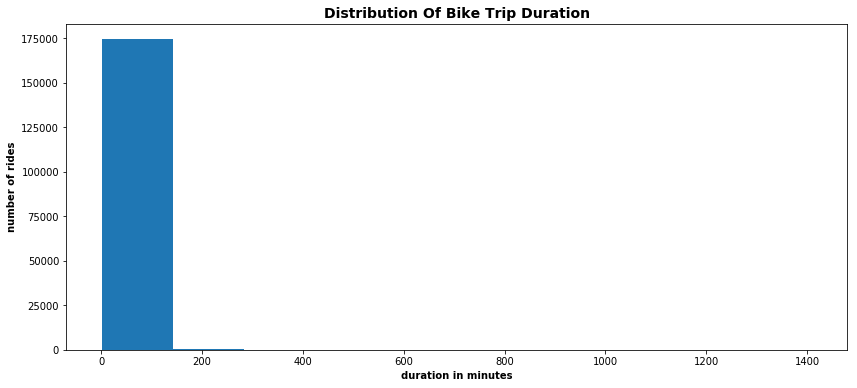

In [75]:
#checking distribution of 'duration_min' column
plt.figure(figsize = [14,6])
plt.hist(bike.duration_min);
plt.title('Distribution of bike trip duration'.title(),fontsize=14, weight='bold')
plt.xlabel('duration in minutes',fontsize=10, weight='bold')
plt.ylabel('number of rides',fontsize=10, weight='bold');

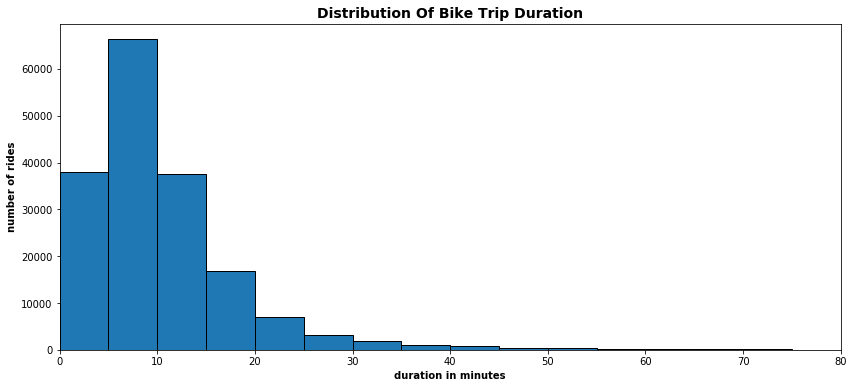

In [76]:
#plotting a histogram of 'duration_min' focusing on the 0-80 minute range
plt.figure(figsize = [14,6])
bins = np.arange(0,80,5)
plt.hist(bike.duration_min, bins = bins, edgecolor = 'black')
plt.xlim(0,80)
plt.title('Distribution of bike trip duration'.title(),fontsize=14, weight='bold')
plt.xlabel('duration in minutes',fontsize=10, weight='bold')
plt.ylabel('number of rides',fontsize=10, weight='bold');

 I plotted a second histogram with focus on the 0-80 minute range for a closer look because that is where majority of the data is concentrated. The distribution is right skewed, with a steep rise in the 5-10 minute range where majority of the values lie, and an equally steep decline in the 10-15 minute range as frequencies go on decreasing.
Majority of rides are therefore 5-10 minutes long.

#### Frequency of rides as per period of the day

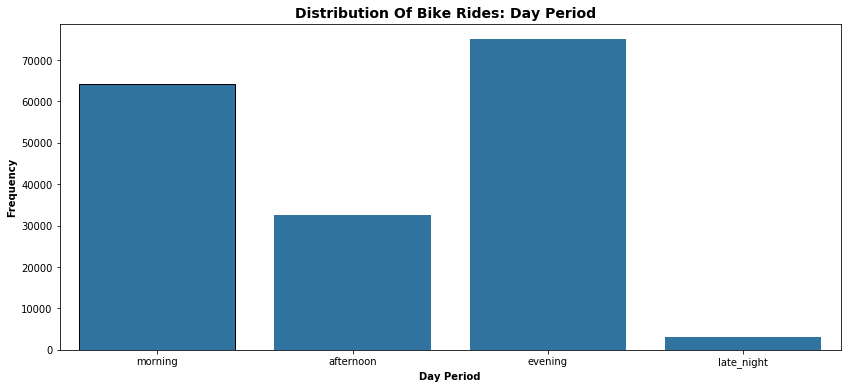

In [77]:
#plotting a bargraph for the 'day_period' variable
Countplot(bike,'day_period')

The period of the day with the highest number of bike rides is the evening, that is between 4 pm and 11 pm. Followed closely by the morning period. The late night period however has a very low frequency of bike rides.

#### Frequency of rides as pertaining to the day of the week

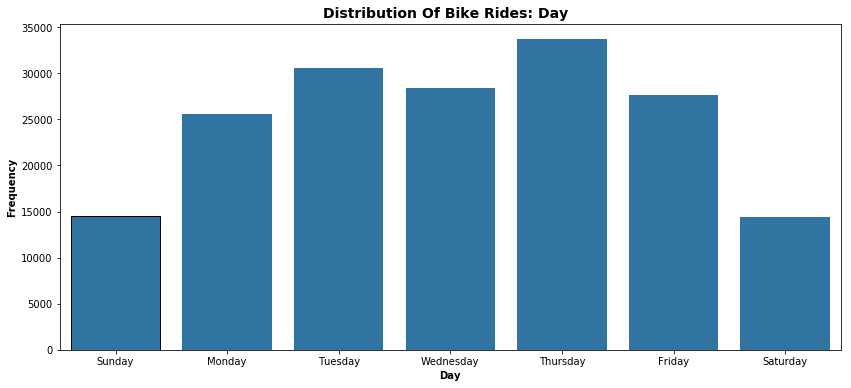

In [78]:
#plotting a bargraph for the 'day' column
Countplot(bike,'day')

The plot shows that Thursdays tend to have the most number of rides,closely followed by Tuesdays, while Saturdays and Sundays register the least number rides.

####  Customers compared to subscribed members.

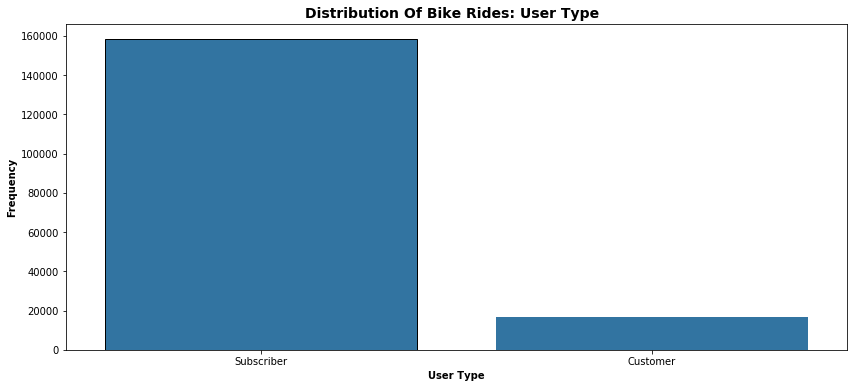

In [79]:
#plotting a bargraph for the 'user_type' column
Countplot(bike,'user_type')

 The plot shows a very large difference in frequency of the categories of bike share system users. Subscribed members appear to log approximately eight times more rides than regular customers.

#### Distribution of frequency of  rides for different age groups

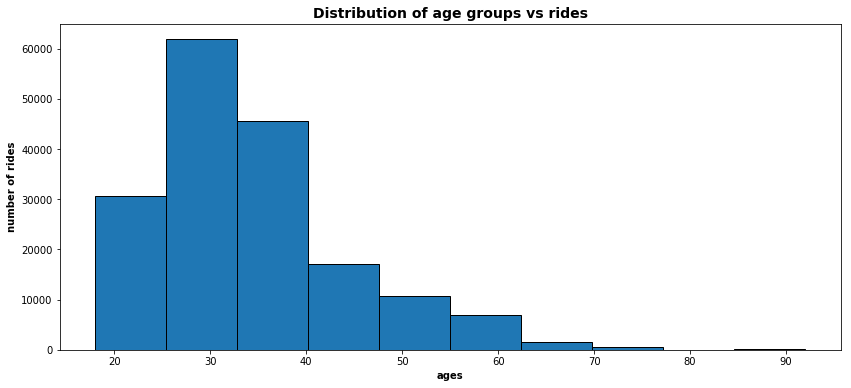

In [80]:
#plotting a histogram for the 'age' column
plt.figure(figsize = [14,6])
plt.hist(bike.age,edgecolor = 'black')
plt.xlabel('ages', fontsize=10, weight = 'bold')
plt.ylabel('number of rides', fontsize=10, weight='bold')
plt.title('Distribution of age groups vs rides', fontsize=14, weight='bold');

The plot reveals a slightly right skewed distribution with a majoriy number of the rides lying in the mid 20's to early 30's age group. There's a sharp drop in the number of rides at the age 40 mark and this drop continuously tapers off, declining as the ages increase up until the 90's.

#### Distribution of the frequency of rides according to gender

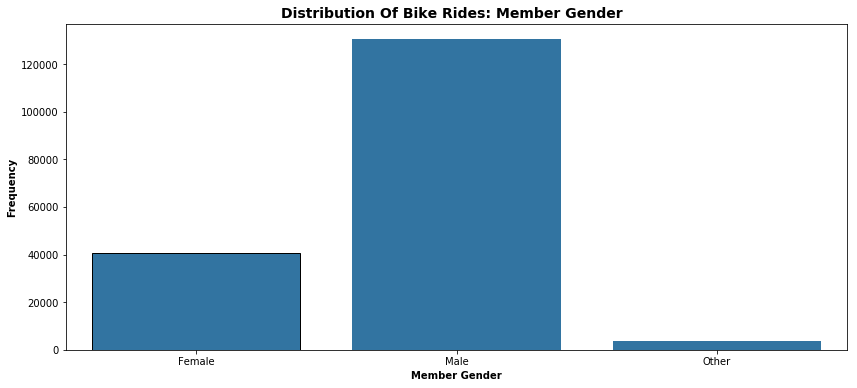

In [81]:
#plotting a bargraph for the 'member_gender' column
Countplot(bike,'member_gender')

The plot shows that a majority of rides are taken by male members, with the number of rides by female members equating to approximately a third of that of male members.

#### Distribution of the kind of usage

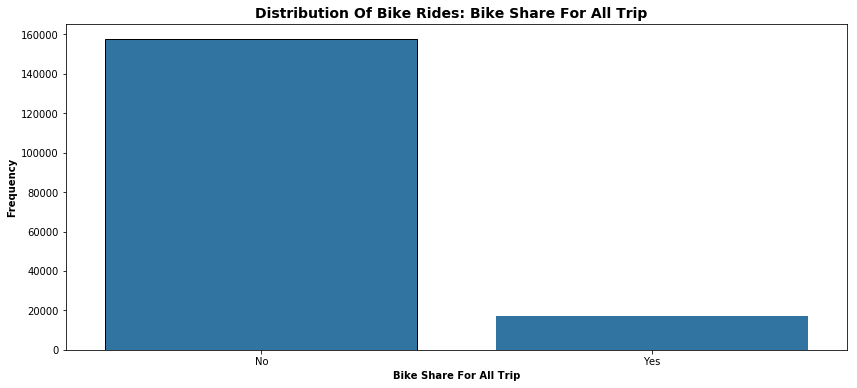

In [82]:
Countplot(bike, 'bike_share_for_all_trip')

The plot shows that majority of the rides are to supplement other means of transport when moving from one point to another

#### Frequency of bike rides throughout the month

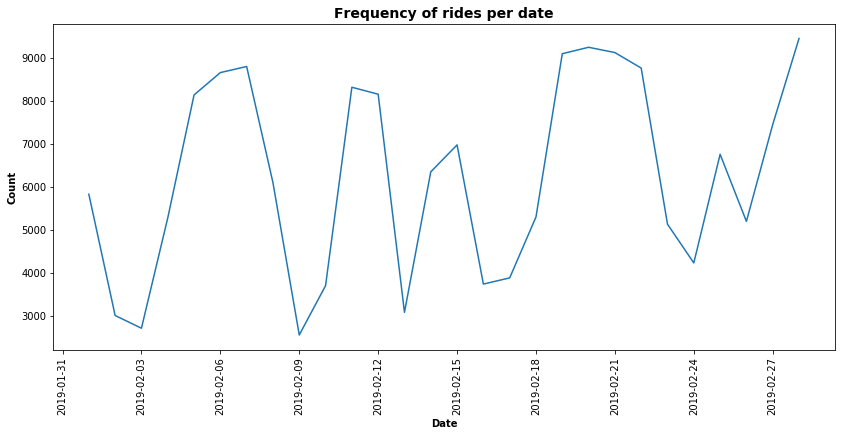

In [83]:
plt.figure(figsize = [14,6])
bike.groupby('date').date.count().plot()
plt.xticks(rotation = 90)
plt.xlabel('Date', fontsize=10, weight='bold')
plt.ylabel('Count', fontsize=10, weight='bold')
plt.title('Frequency of rides per date', fontsize=14, weight='bold');

The plot shows an up and down trend in the number of rides throughout the month. There are wide peaks and sharp valleys. I would attribute this to the distribution shown earlier in the days of the week plot, where weekends tend to have a lower number of bike rides logged, compared to weekdays.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Starting off with the time and date variables: For the bike **duration_min** variable, there was a very large range in the distribution of values. However, majority of the values were concentrated on the extreme lower end. On plotting these on a smaller scale, an extremely right skewed distribution was yielded.

> The distribution of the **day_period** variable showed the evening as having the most number of rides, followed closely by the morning, then the afternoon period and finally the late night with and extreme low number of rides.

> As for the **day** feature, I observed that the weekends, Saturdays and Sundays had noteably lower frequencies of rides as compared to the weekdays.

>For the demographic variables; the **age** feature showed a slight right skewed distribution. With majority of rides lying in the mid 20's to early 30's age group. There's also a noteable sharp drop in the number of rides at the age 40 mark.

> The **member_gender** feature distribution showed the frequency of rides by male members being alot higher compared to that of female members and others.

> Finally, the **user_type** distribution revealed that subscribed members log alot more rides than non-subscribed members.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The most unusual distribution was the **duration_min** and **age** features which had a wide range of values and therefore right skewed distributions.

> I performed a number of transformations on the data including correcting data types of the **start_time** and **end_time** features to *datetime* in order to be able to derive other features from these.

> I added three columns **'date', 'day', 'day_period'** derived from the **'start_time'** column  so as to enable me investigate each feature categorically and quantitatively, this would have otherwise been complicated by having these features all under one variable.

> I also added **'age'** derived from **'member_birth_year'** column and **'duration_min'** derived from the **'duration_sec'** column. 

>For the **age** variable, I figured it would in this context, make more sense to group users by the age groups rather than the year in which they were born because there was a greater interest in the ages as opposed to the particular years of birth.

>As for the **duration_min** variable, I converted the available bike ride duration given in seconds, because it is easier to  percieve time in so many minutes compared to so many seconds.

>I also dropped approximately 10,000 rows from the dataset, which either had null values and a few whose *age* value was 99 and over.

## Bivariate Exploration


In [84]:
bike.head()

,start_time,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,date,day,age,duration_min,day_period
0,2019-02-28 10:30:03.377,36190,2019-02-28 20:33:14.228,58.0,Market St at 10th St,37.776619,-122.417385,375.0,Grove St at Masonic Ave,37.774836,...,5465,Subscriber,1991,Female,No,2019-02-28,Thursday,28,603.166667,morning
1,2019-02-28 09:20:43.087,31633,2019-02-28 18:07:56.344,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,2270,Customer,1984,Female,No,2019-02-28,Thursday,35,527.216667,morning
2,2019-02-28 09:35:13.840,30666,2019-02-28 18:06:20.011,58.0,Market St at 10th St,37.776619,-122.417385,11.0,Davis St at Jackson St,37.797280,...,5522,Customer,1988,Male,No,2019-02-28,Thursday,31,511.100000,morning
3,2019-02-28 11:56:08.063,21883,2019-02-28 18:00:52.007,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,4635,Subscriber,1980,Female,Yes,2019-02-28,Thursday,39,364.716667,morning
4,2019-02-28 08:52:26.557,26988,2019-02-28 16:22:14.575,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,112.0,Harrison St at 17th St,37.763847,...,6558,Subscriber,1986,Male,Yes,2019-02-28,Thursday,33,449.800000,morning


#### Ride duration vs period of the day
Checking distribution of the ride durations for each period of the day

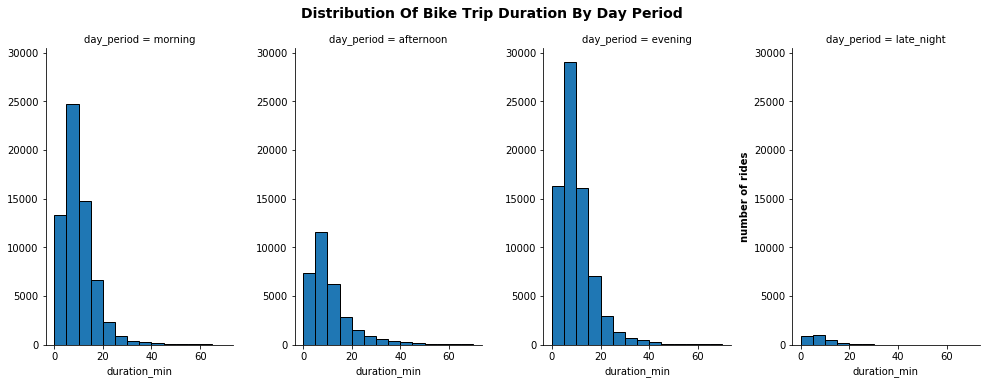

In [85]:
# plotting a Facet grid)
bins = np.arange(0,75,5)
g = sb.FacetGrid
g = sb.FacetGrid(data=bike, col = 'day_period')
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black')
g.fig.set_size_inches(14,6)
plt.ylabel('number of rides',fontsize=10, weight='bold');
plt.suptitle('Distribution of bike trip duration by day period'.title(), fontsize=14, weight='bold');


The distribution of the ride duration values throughout all the periods of the day, except the late night still shows the 5-10 minute rides being a majority. Minor differences are however seen for other time ranges. In the mornings, there are more 10-15 minute rides as opposed to 0-5 minute rides. The opposite is however true for the afternoon and evening. The late night period is an exception to all this because it appears to have an equal number of rides that are in the 0-5 and 5-10 minute ranges, these being the majority.

#### Ride duration vs day of the week
Checking distributions of ride durations for each day of the week.

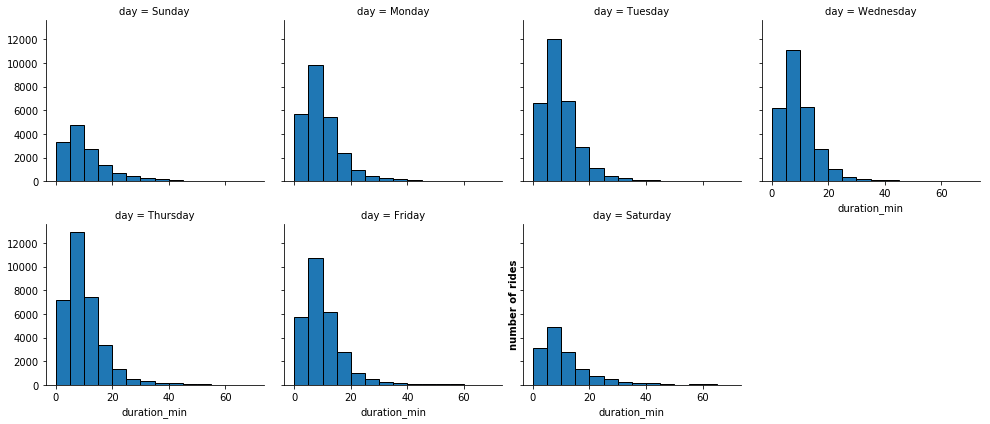

In [86]:
bins = np.arange(0,75,5)
g = sb.FacetGrid(data=bike, col = 'day', col_wrap = 4)
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black')
g.fig.set_size_inches(14,6)
plt.ylabel('number of rides',fontsize=10, weight='bold');
#plt.suptitle('Distribution of ride duration by day'.title(), fontsize=14, weight='bold');

The distribution of the ride duration values against days of the week also still shows that 5-10 minute bike rides were the majority across all the days of the week. The variations here also appear in the differences betweeen 0-5 minute and 10-15 minute ranges. On Sundays,Mondays and Saturdays, the number of 0-5 minute bike rides are slightly higher, while on Tuesdays and Thursdays the 10-15 minute bike rides are slightly more. Note that Tuesdays and Thursdays overall have the highest number of bike rides throughout the week. Perhaps they are the busier days, hence why people are taking longer bike rides to supplement regular transport means.

#### Ride duration vs age
Checking if there is a correlation between the duration of bike rides and age.
Due to the large number of values, I used a random sample of 2500 records.

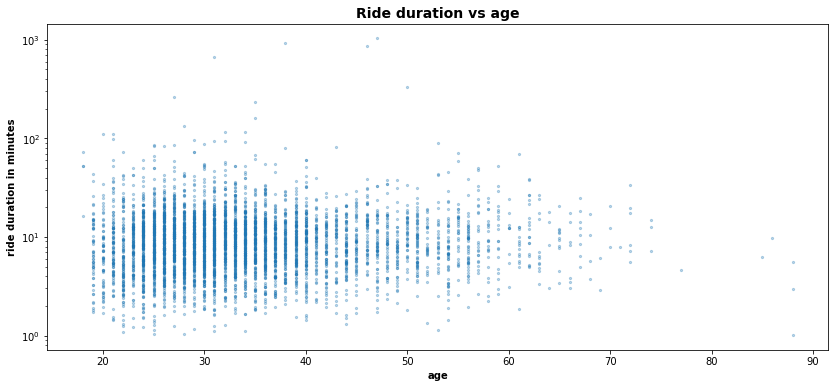

In [87]:
bike_sample = bike.sample(5000)
plt.figure(figsize = [14,6])
plt.scatter(data = bike_sample, x = 'age', y = 'duration_min', alpha = 0.3, s=5)
plt.yscale('log')
plt.xlabel('age',fontsize=10, weight='bold')
plt.ylabel('ride duration in minutes',fontsize=10, weight='bold')
plt.title('Ride duration vs age',fontsize=14, weight='bold');

 There is no correlation between age and ride duration. Majority of the rides are in the 5-15 minute range, regardless of age.

> Curious to see the trend of average ride duration per age

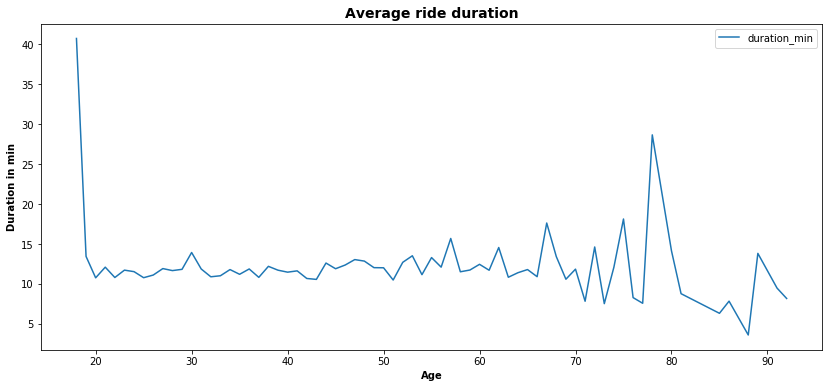

In [88]:
#line plot
plt.figure(figsize = [14,6])
bike.groupby('age').duration_min.mean().plot(legend = True);
plt.xlabel('Age',fontsize=10, weight='bold')
plt.ylabel('Duration in min', fontsize=10, weight='bold')
plt.title('Average ride duration', fontsize=14, weight='bold');

For ages, 19 to 70, the average ride duration lies between 10 and 15 minutes. The extreme values seen for 18 year old age group can be attested to the relatively fewer number of records for this age. This can also explain sharp flactuations seen in the older age groups. 

#### Ride duration vs gender
Checking the distribution of ride duration for each gender

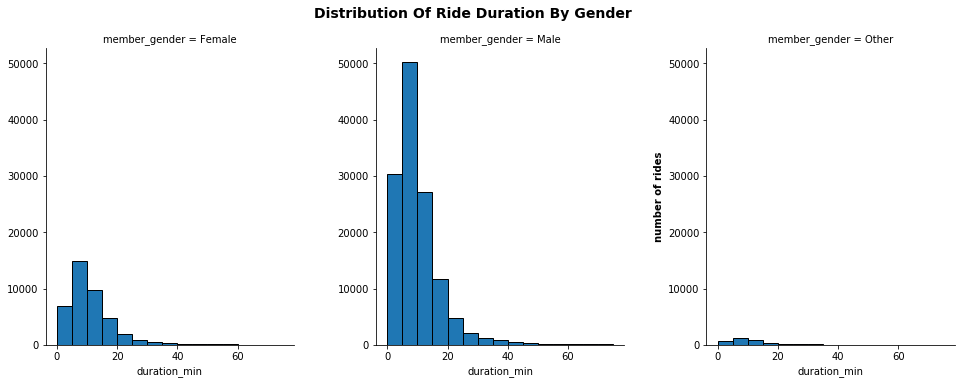

In [89]:
#plotting a FacetGrid
bins = np.arange(0,80,5)
g = sb.FacetGrid
g = sb.FacetGrid(data=bike, col = 'member_gender')
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black')
g.fig.set_size_inches(14,6)
plt.ylabel('number of rides',fontsize=10, weight='bold');
plt.suptitle('Distribution of ride duration by gender'.title(), fontsize=14, weight='bold');

The 5-10 minute ride duration still  has the highest frequency across all genders. However, there are more 10-15 minute rides relative to 0-5 minute rides by female members while the opposite is true for male members.

#### Ride duration vs user type
Comparing the distribution of ride duration for each user type.

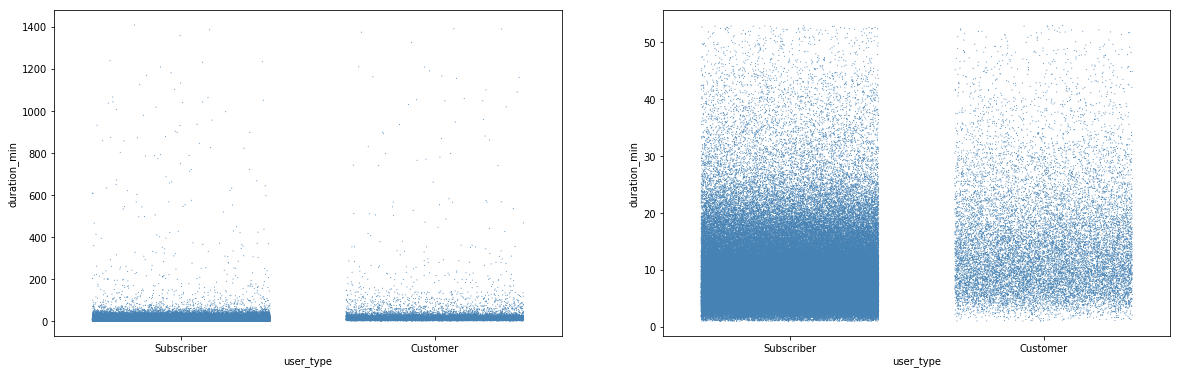

In [90]:
plt.figure(figsize = [20, 6])

plt.subplot(1,2,1)
sb.stripplot(data=bike, x='user_type', y='duration_min',size=1, jitter=0.35,color = 'steelblue')

plt.subplot(1,2,2)
sb.stripplot(data=bike.query('duration_min < duration_min.quantile(0.99)'), x='user_type', y='duration_min', size=1, jitter=0.35, color = 'steelblue');

The plots show that the distributions of ride durations for both customers and subscribed members are very similar, despite the differences in the numbers of both groups.

#### Period of the day vs day
Checking for variations in the number of rides for each period of the day across all days.

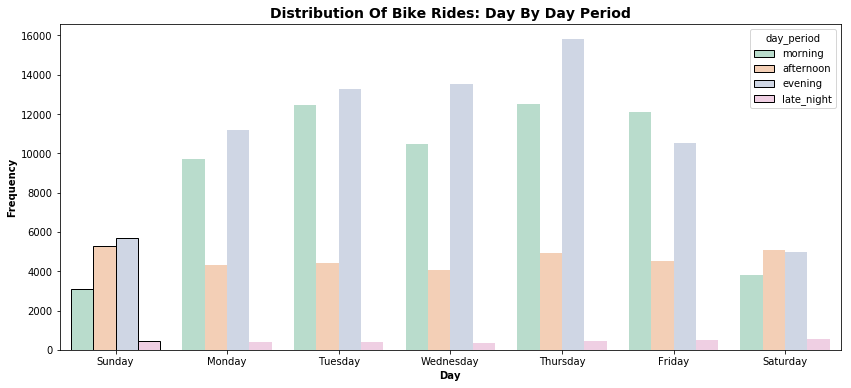

In [91]:
#clustered bar chart
Countplot(bike, 'day', huevar='day_period', palette='Pastel2')

On the week-days, mornings and evenings are seen to have the higher numbers of bike rides. While on the weekends, afternoons and evenings have the higher numbers with each of their counts being nearly equal. Although evenings have been seen to have the highest number of bike rides generally, Friday evenings have a lower number of rides compared to Friday mornings.

#### Period of the day vs age
Checking the distribution of ages relative to the period of the day.

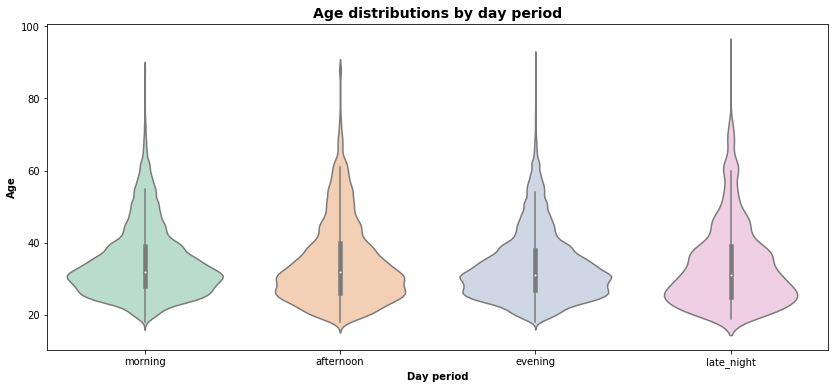

In [92]:
plt.figure(figsize = [14,6])
sb.violinplot(data = bike, x = 'day_period', y = 'age', palette = 'Pastel2')
plt.xlabel('Day period', fontsize=10, weight='bold')
plt.ylabel('Age', fontsize=10, weight='bold')
plt.title('Age distributions by day period', fontsize=14, weight='bold');

The age distribution is similar across all periods of the day, appearing right skewed for all of them. The modal age for the morning, afternoon and evening periods lies between late 20's and early 30's while the modal age for the late night  period lies between mid and late 20's.

#### Period of the day vs gender

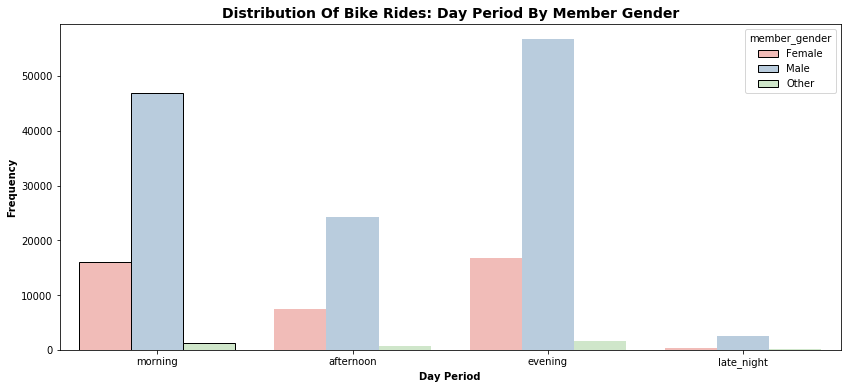

In [93]:
#clustered bar chart
Countplot(bike, 'day_period', huevar='member_gender', palette = 'Pastel1')

The period of the day doesn't really affect the frequency of rides according to gender. It's however notable that the same number of rides by the female gender group is seen for the morning and evening while for males the number is slightly increased in the evening.

#### Day vs gender

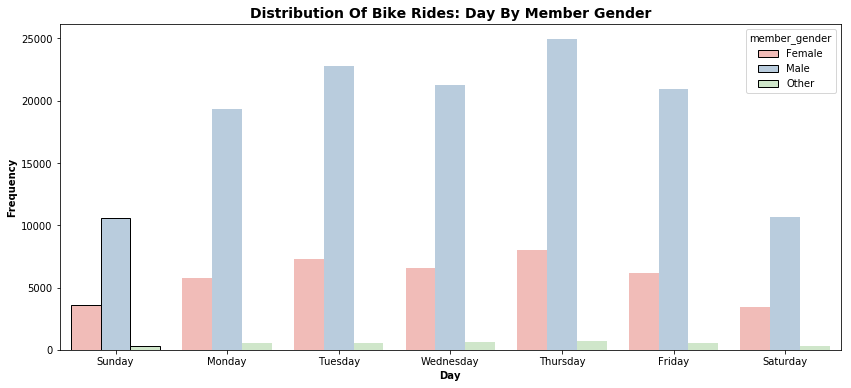

In [94]:
#clustered bar chart
Countplot(bike, 'day', huevar='member_gender', palette='Pastel1')

The day and gender variables are independent of each other. The frequency of bike rides by gender is not affected by any particular day of the week.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The features of interest were observed to be largely independent with only slight variations when plotted against each other and in other instances, no variations at all. 

>The ride duration showed slight variations when plotted against period of day, day of the week and gender and no correlation when plotted against age.

>There were also slight variations in the number of rides logged for certain values of day period when plotted against days. However, there was no effect on the number of rides when the period of the day was plotted against gender, same thing when the days were plotted against gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to note that the distributions of ride durations for both customers and subscribed members are very similar, despite the differences in the numbers of both groups.

## Multivariate Exploration


Due to the notable largely independent nature of the gender variable, I will be leaving it out in my multivariate exploration. Instead, I will explore how the **age** and **ride duration** features each independently affect the frequency of bike rides with respect to **day** and **period of day**, seeing as they (**age** and **ride duration**) have no correlation.

#### Age, day, period of day

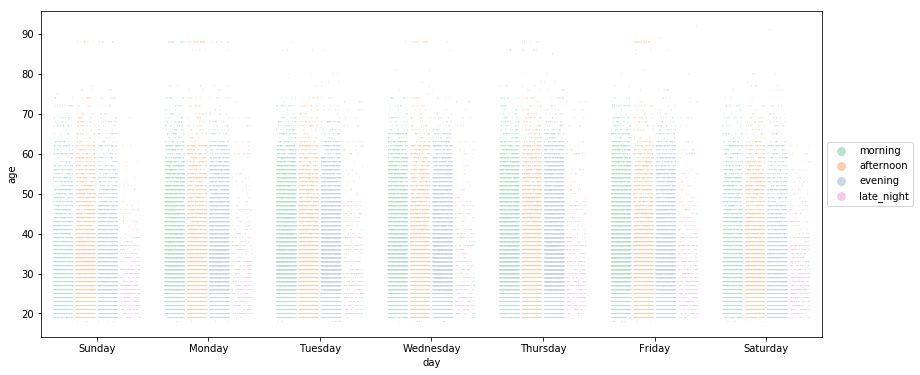

In [95]:
plt.figure(figsize = [14,6])
sb.stripplot(data=bike, x='day',y='age', hue='day_period',palette='Pastel2', size=1, jitter=0.35, dodge=True);
plt.legend(loc=6, bbox_to_anchor=(1.0,0.5));

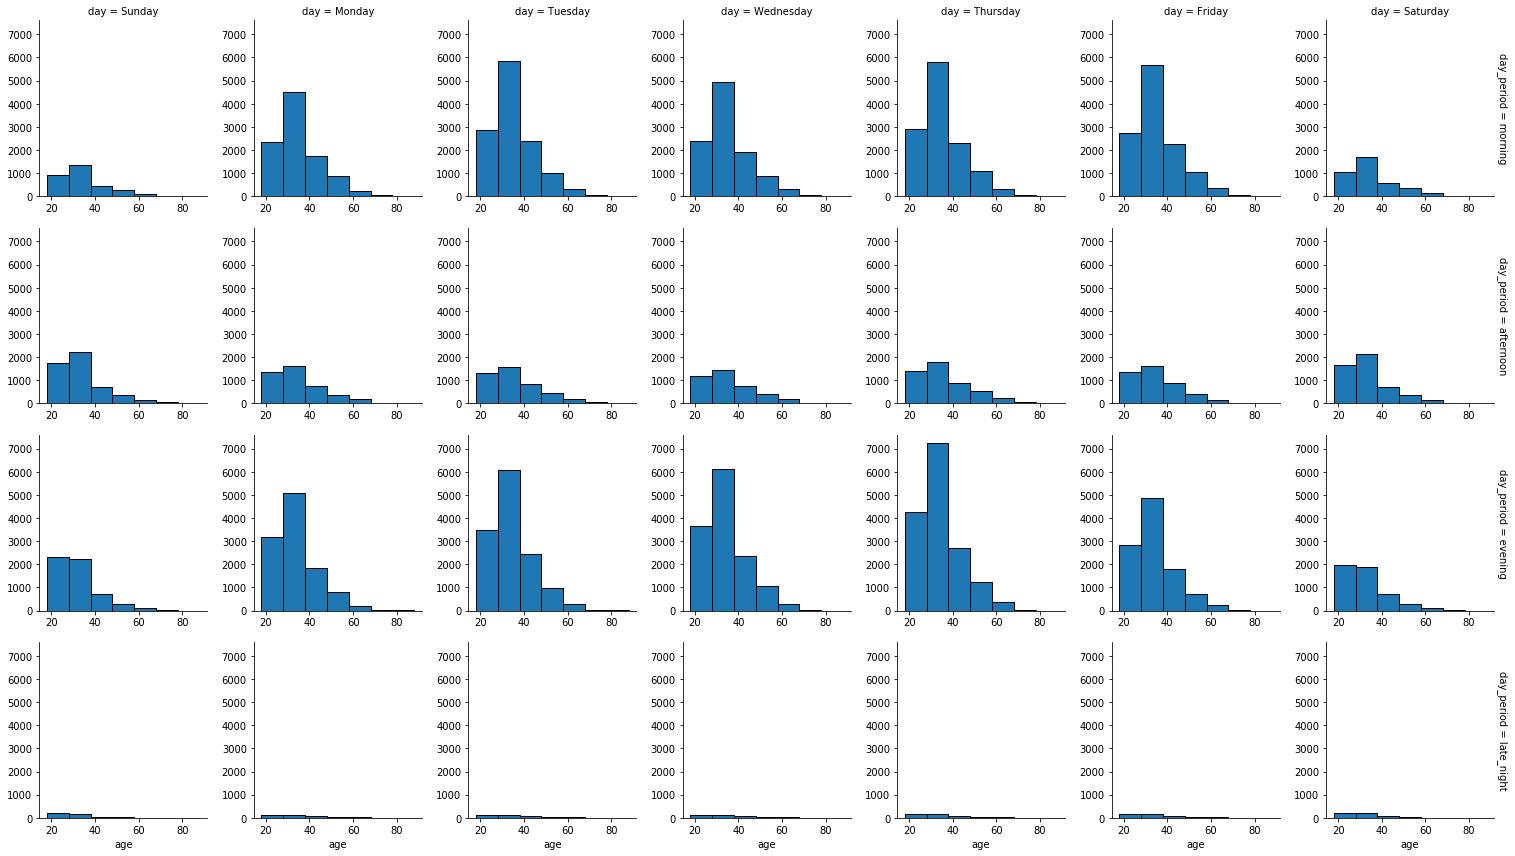

In [96]:
g = sb.FacetGrid(data = bike, col = 'day', row = 'day_period',margin_titles = True)
bins = np.arange(18,90,10)
g.map(plt.hist, 'age', bins = bins, edgecolor = 'black');

The day,period of day and age features enhance each other and only further confirm the observations as seen in earlier univariate and bivariate plots. The highest frequency of rides is seen on Thursday evenings among the 30's age group and the lowest frequencies are seen throughout late nights.

#### Duration, day, period of day

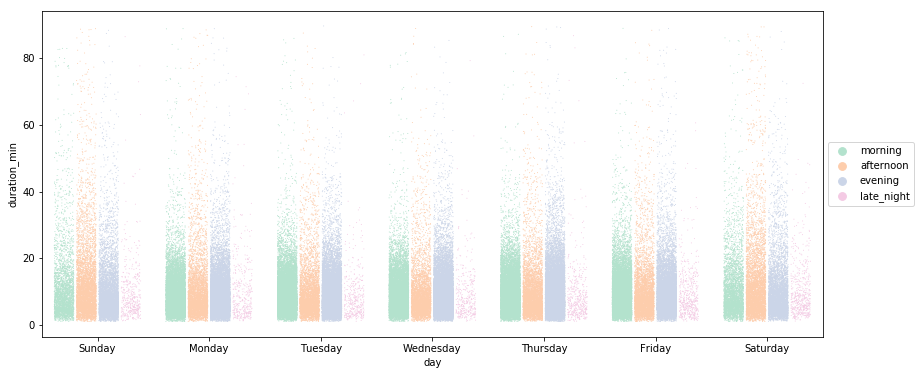

In [97]:
plt.figure(figsize = [14,6])
sb.stripplot(data=bike.query('duration_min < 90'), x='day',y='duration_min', hue='day_period',palette='Pastel2', size=1, jitter=0.35, dodge=True)
plt.legend(loc=6, bbox_to_anchor=(1.0,0.5));

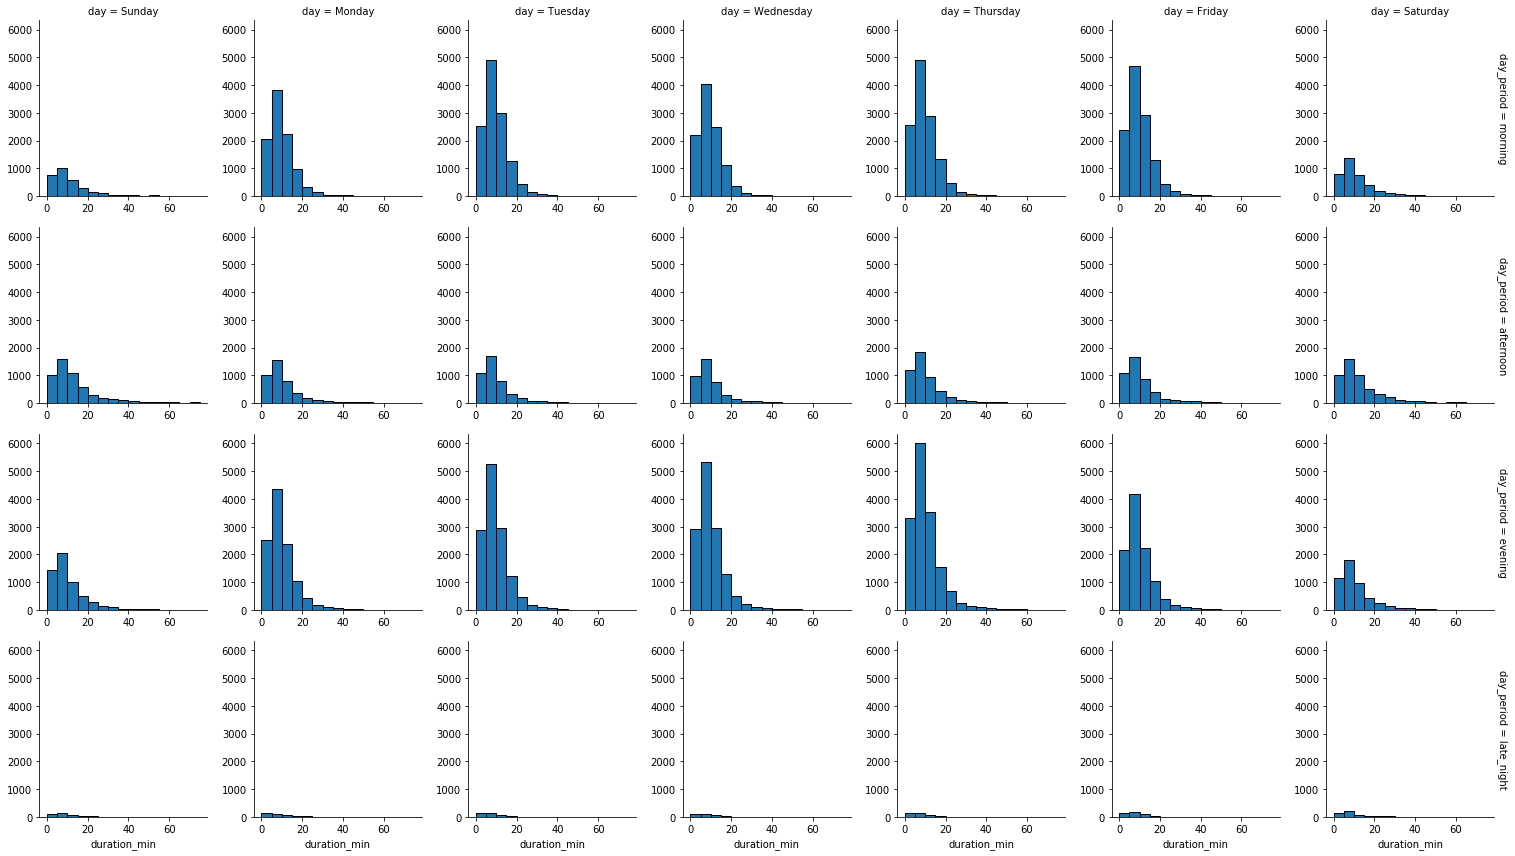

In [98]:
g = sb.FacetGrid(data = bike, col = 'day', row = 'day_period',margin_titles = True)
bins = np.arange(0,80,5)
g.map(plt.hist, 'duration_min', bins = bins, edgecolor = 'black');

A similar observation is noted for the ride duration, day and period of day features. enhance each other and only further .The highest frequency of rides is seen on Thursday evenings for the 5-10 minute bike rides, while the lowest frequencies of rides are generally seen throughout late nights.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The day,period of day and age features enhance each other and only further confirm the observations as seen in earlier univariate and bivariate plots. The highest frequency of rides is seen on Thursday evenings among the 30's age group.

> A similar observation is noted for the ride duration, day and period of day features. enhance each other and only further .The highest frequency of rides is seen on Thursday evenings for the 5-10 minute bike rides.

> Comparing the distribution sizes of the age and ride duration plots, I'd say that age has a larger effect on the frequency of bike rides than ride duration does.

### Were there any interesting or surprising interactions between features?

> There were no particularly surprising interactions between features. The multivariate plots mostly enhanced what was seen in the earlier univariate and bivariate plots.